### CUSTOMER CHURN PREDICTION

### Introduction:
Customer churn prediction is a critical task for businesses operating in subscription-based industries such as telecommunications, software as a service (SaaS), and retail. Churn refers to the phenomenon where customers discontinue their relationship with a company or stop using its services. It is essential for businesses to identify and understand the factors that contribute to churn in order to take proactive measures to retain customers and maximize revenue.









### Business Understanding:
In this project, we aim to develop a machine learning model to predict customer churn for a telecommunications company. By analyzing historical customer data, we seek to identify patterns and trends that are indicative of potential churn. The model will help the company anticipate which customers are likely to churn in the future, allowing them to implement targeted retention strategies.

Understanding the factors influencing churn is crucial for businesses to make informed decisions and allocate resources effectively. By predicting churn accurately, companies can take proactive steps such as offering incentives, personalized promotions, or improving customer service to retain customers and mitigate revenue loss. Additionally, reducing churn can lead to increased customer satisfaction, loyalty, and long-term profitability for the business.

Through this project, we aim to provide actionable insights to the telecommunications company that can help them reduce churn rates, improve customer retention, and ultimately enhance business performance.

#### Goal 




 Null hypothesis :
 
    1. There is no significant correlation between  MonthlyCharges and customer churn
   
 
Alternative hypothesis:

    1. There is a statistically significant correlation between MonthlyCharges and customer Churn
   
 
   ### Analytical questions
 
1. What is the total churn rate?
2. How does the different boolean attributes affect the churn?
3. How does the different non-boolean attributes affect the churn?
4. How does the different numerical attributes affect the churn?
5. How does tenure affect the churn?
6. How does the type of internet service affect churn?
7. How does the type of contract affect the churn?
8. How does the type of payment method affect the churn?
 
 

### DATA UNDERSTANDING

| Variable         | Description                                       | Data Type | Possible Values                          |
|------------------|---------------------------------------------------|-----------|------------------------------------------|
| customerID       | Unique identifier for each customer               | String    |                                          |
| gender           | Gender of the customer                            | String    | 'Male', 'Female'                        |
| SeniorCitizen    | Indicates if the customer is a senior citizen     | Boolean   | True (1), False (0)                     |
| Partner          | Indicates if the customer has a partner           | Boolean   | True (1), False (0)                     |
| Dependents       | Indicates if the customer has dependents          | Boolean   | True (1), False (0)                     |
| tenure           | Number of months the customer has been with the company | Integer |                                          |
| PhoneService     | Indicates if the customer has phone service       | Boolean   | True (1), False (0)                     |
| MultipleLines    | Indicates if the customer has multiple lines      | String    | 'Yes', 'No', 'No phone service'        |
| InternetService  | Type of internet service                          | String    | 'DSL', 'Fiber optic', 'No'             |
| OnlineSecurity   | Indicates if the customer has online security     | String    | 'Yes', 'No', 'No internet service'     |
| DeviceProtection | Indicates if the customer has device protection   | String    | 'Yes', 'No', 'No internet service'     |
| TechSupport      | Indicates if the customer has tech support        | String    | 'Yes', 'No', 'No internet service'     |
| StreamingTV      | Indicates if the customer has streaming TV        | String    | 'Yes', 'No', 'No internet service'     |
| StreamingMovies  | Indicates if the customer has streaming movies    | String    | 'Yes', 'No', 'No internet service'     |
| Contract         | Type of contract                                  | String    | 'Month-to-month', 'One year', 'Two year' |
| PaperlessBilling | Indicates if the customer has paperless billing  | Boolean   | True (1), False (0)                     |
| PaymentMethod    | Payment method                                    | String    | 'Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)' |
| MonthlyCharges   | Monthly charges                                   | Float     |                                          |
| TotalCharges     | Total charges                                     | Float     |                                          |
| Churn            | Indicates if the customer churned                | Boolean   | True (1), False (0)                     |


#### Data Connection

In [ ]:
#importing packages
import pyodbc 
#import the dotenv_values function from the dotenv package    
from dotenv import dotenv_values 
import pandas as pd
import warnings 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import RobustScaler, OneHotEncoder



warnings.filterwarnings('ignore')


In [ ]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

In [ ]:
# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER_NAME")
database = environment_variables.get("DATABASE_NAME")
username = environment_variables.get("USER")
password = environment_variables.get("PASSWORD")


In [ ]:
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [ ]:

# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection = pyodbc.connect(connection_string)

### Load First Dataset

In [ ]:
query = "Select * from LP2_Telco_churn_first_3000"




In [ ]:
df1 = pd.read_sql(query, connection)



DatabaseError: Execution failed on sql: Select * from LP2_Telco_churn_first_3000
('08S01', '[08S01] [Microsoft][ODBC SQL Server Driver]Communication link failure (0) (SQLExecDirectW)')
unable to rollback

In [ ]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


### Load Second Dataset

In [ ]:


# Assuming the CSV file is located in the data directory
csv_file_path = r"C:\Users\User\Desktop\Azubi_Projects\Customer_Churn-Prediction\Data\LP2_Telco-churn-second-2000.csv"


# Load the CSV file into a pandas DataFrame
df2 = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
df2.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


### Concat Dataset

In [ ]:

# Concatenate them vertically (along the rows)
full_data = pd.concat([df1, df2])

# If you want to reset the index after concatenating
full_data.reset_index(drop=True, inplace=True)

full_data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


### Clean Dataset

In [ ]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [ ]:
full_data.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [ ]:
#replacing missing values with the mean for numerical variables and the mode for categorical variables:

def impute_missing_values(df):
    
    # Iterate through each column
    for column in df.columns:
        # Check if the column has missing values
        if df[column].isnull().sum() > 0:
            # Check if the column is numerical or categorical
            if pd.api.types.is_numeric_dtype(df[column]):
                # Impute missing values with the mean
                df[column].fillna(df[column].mean(), inplace=True)
            else:
                # Impute missing values with the mode (most frequent value)
                mode_value = df[column].mode()[0]
                df[column].fillna(mode_value, inplace=True)
    
    return df

# Example usage:
full_data = impute_missing_values(full_data)
full_data['SeniorCitizen'] = full_data['SeniorCitizen'].astype(bool)
full_data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,False,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,False,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [ ]:
full_data.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
full_data['InternetService']

0               DSL
1               DSL
2               DSL
3               DSL
4       Fiber optic
           ...     
5038            DSL
5039    Fiber optic
5040            DSL
5041    Fiber optic
5042    Fiber optic
Name: InternetService, Length: 5043, dtype: object

In [ ]:
# function to handle the values and convert them to boolean values 'Yes' and 'No' only:

def convert_to_yes_no(df, column_name):
    
    # Define mapping for conversion
    mapping = {True: 'Yes', False: 'No', 'True': 'Yes', 'False': 'No', 'Yes': 'Yes', 'No': 'No','No internet service': 'No','No phone service': 'No','DSL':'Yes','Fiber optic': 'Yes'}
    
    # Convert column values using the mapping
    df[column_name] = df[column_name].map(mapping)
    
    return df



# Example usage:
full_data = convert_to_yes_no(full_data, 'Partner')
full_data = convert_to_yes_no(full_data, 'Dependents')
full_data = convert_to_yes_no(full_data,'PhoneService')
full_data = convert_to_yes_no(full_data,'MultipleLines')
full_data = convert_to_yes_no(full_data,'OnlineSecurity')
full_data = convert_to_yes_no(full_data,'DeviceProtection')
full_data = convert_to_yes_no(full_data,'TechSupport')
full_data = convert_to_yes_no(full_data,'StreamingTV')
full_data = convert_to_yes_no(full_data,'StreamingMovies')
full_data = convert_to_yes_no(full_data,'PaperlessBilling')
full_data = convert_to_yes_no(full_data,'InternetService')
full_data = convert_to_yes_no(full_data,'Churn')
full_data = convert_to_yes_no(full_data,'SeniorCitizen')



In [ ]:
full_data.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
full_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No,Yes,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,Yes,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,Yes,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No,Yes,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Yes,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [ ]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   object 
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     5043 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    5043 non-null   object 
 10  OnlineBackup      5043 non-null   object 
 11  DeviceProtection  5043 non-null   object 
 12  TechSupport       5043 non-null   object 
 13  StreamingTV       5043 non-null   object 
 14  StreamingMovies   5043 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [ ]:
def clean_and_convert_object_to_float(df, columns):
   
    # Iterate through each column in the list of columns
    for column in columns:
        # Check if the column contains numerical values
        if df[column].dtype == 'object':
            # Clean the column by removing non-numeric values and converting to float
            df[column] = pd.to_numeric(df[column], errors='coerce')
    
    return df

# Example usage:
full_data= clean_and_convert_object_to_float(full_data, ['TotalCharges'])
full_data= clean_and_convert_object_to_float(full_data, ['MonthlyCharges'])
# Assuming 'df' is your DataFrame containing the 'SeniorCitizen' column
#full_data['SeniorCitizen'] = full_data['SeniorCitizen'].astype(bool)

full_data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No,Yes,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,Yes,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,Yes,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No,Yes,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Yes,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [ ]:
object_columns = full_data.select_dtypes('object').columns
object_columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn'],
      dtype='object')

In [ ]:
# Assuming 'df' is your DataFrame containing the data
object_columns = full_data.select_dtypes(include=['object']).columns

# List of non-categorical object columns to drop
non_categorical_columns = []

# Check each object column if it's categorical
for col in object_columns:
    if len(full_data[col].unique()) > 10:  # Adjust the threshold as needed
        non_categorical_columns.append(col)

# Drop non-categorical object columns
categorical_columns = object_columns.drop(non_categorical_columns)
categorical_columns


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [ ]:
full_data.select_dtypes('number').columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

## 1. EDA


##### 1.1 Visualization of the distribution of numerical features  using histograms or box plots. 

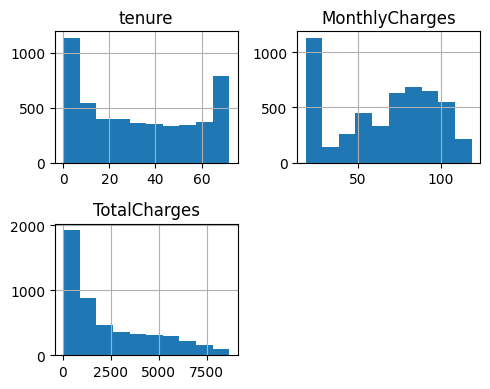

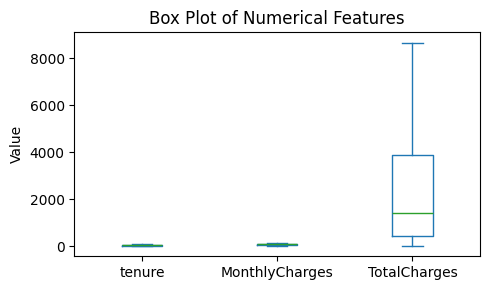

In [ ]:




df = pd.DataFrame(full_data)

# Plot histograms for numerical features
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
df[numerical_features].hist(figsize=(5, 4))
plt.tight_layout()
plt.show()

# Plot box plots for numerical features
df[numerical_features].plot(kind="box", figsize=(5, 3))
plt.title("Box Plot of Numerical Features")
plt.ylabel("Value")
plt.tight_layout()
plt.show()


##### 2.1 Exploration of categorical features 

In [ ]:
# Explore categorical features using value_counts()
categorical_features = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", 
                        "MultipleLines", "InternetService", "OnlineSecurity", "DeviceProtection", 
                        "TechSupport", "StreamingTV", "StreamingMovies", "Contract", 
                        "PaperlessBilling", "PaymentMethod", "Churn"]

for feature in categorical_features:
    print(full_data[feature].value_counts())
    print( "="*20)


gender
Male      2559
Female    2484
Name: count, dtype: int64
SeniorCitizen
No     4224
Yes     819
Name: count, dtype: int64
Partner
No     2585
Yes    2458
Name: count, dtype: int64
Dependents
No     3482
Yes    1561
Name: count, dtype: int64
PhoneService
Yes    4554
No      489
Name: count, dtype: int64
MultipleLines
No     2913
Yes    2130
Name: count, dtype: int64
InternetService
Yes    3963
No     1080
Name: count, dtype: int64
OnlineSecurity
No     3587
Yes    1456
Name: count, dtype: int64
DeviceProtection
No     3299
Yes    1744
Name: count, dtype: int64
TechSupport
No     3552
Yes    1491
Name: count, dtype: int64
StreamingTV
No     3098
Yes    1945
Name: count, dtype: int64
StreamingMovies
Yes    2633
No     2410
Name: count, dtype: int64
Contract
Month-to-month    2744
Two year          1244
One year          1055
Name: count, dtype: int64
PaperlessBilling
Yes    2996
No     2047
Name: count, dtype: int64
PaymentMethod
Electronic check             1700
Mailed check        

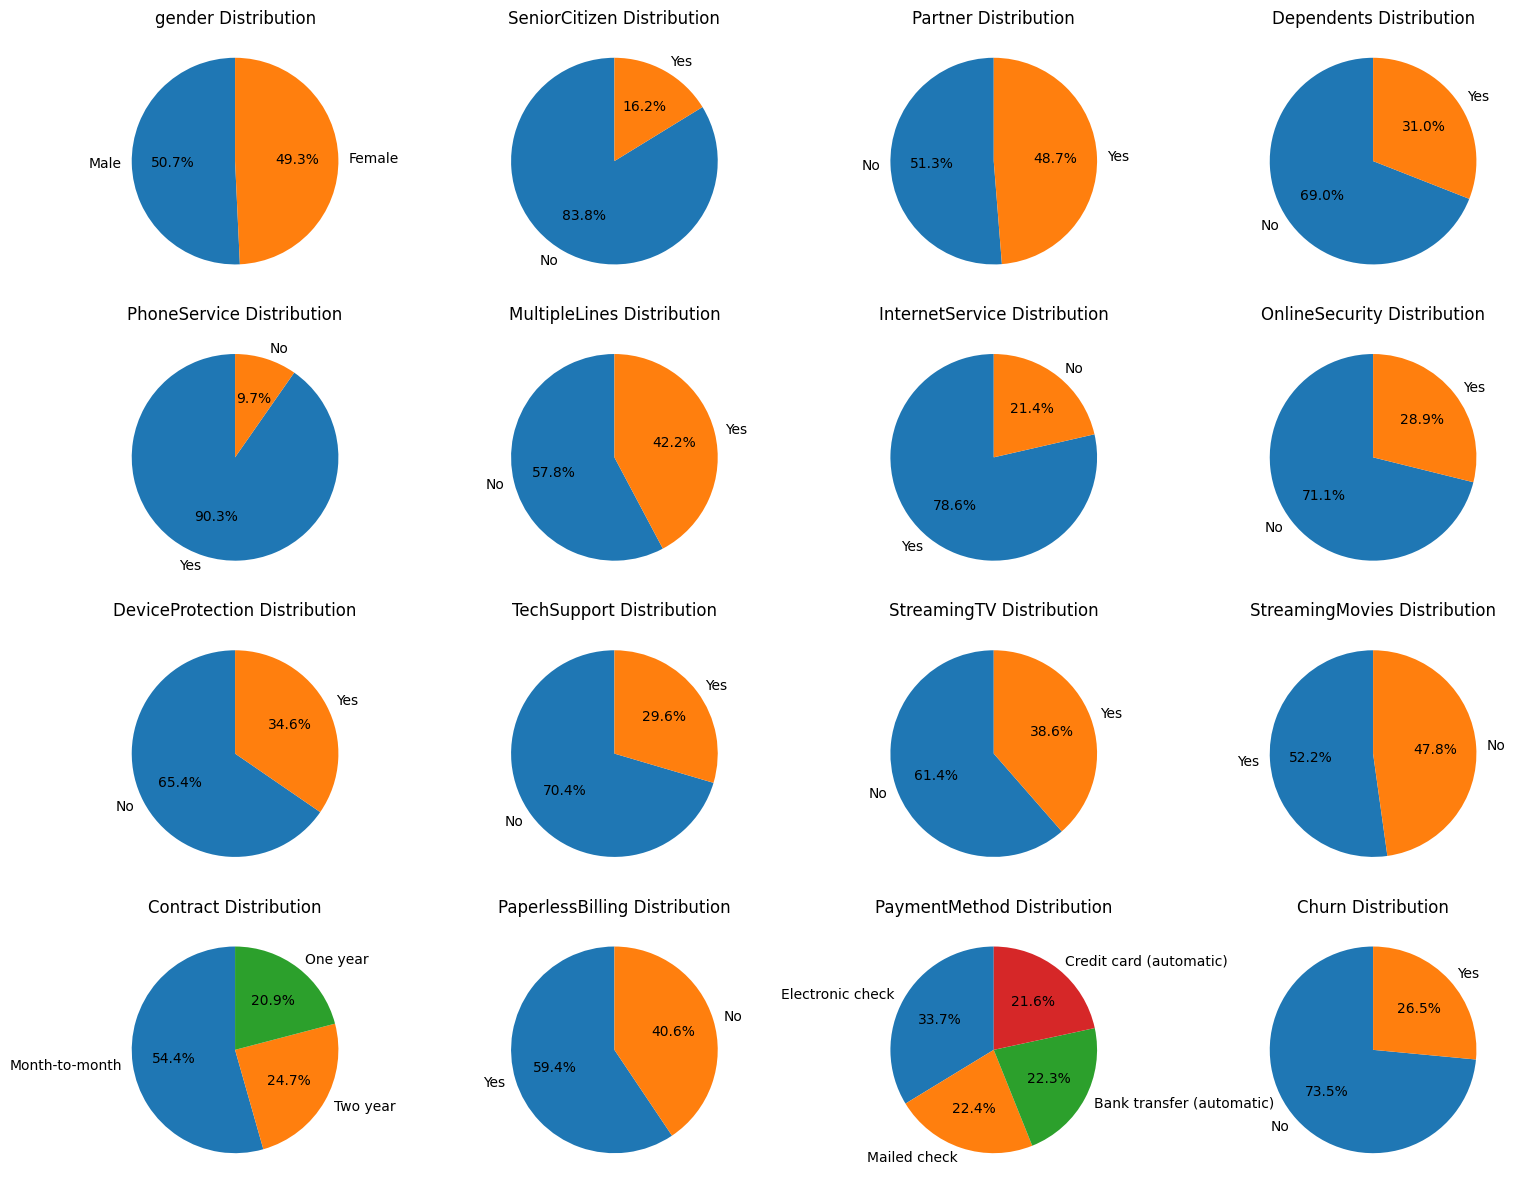

In [ ]:


# Define categorical features
categorical_features = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", 
                        "MultipleLines", "InternetService", "OnlineSecurity", "DeviceProtection", 
                        "TechSupport", "StreamingTV", "StreamingMovies", "Contract", 
                        "PaperlessBilling", "PaymentMethod", "Churn"]

# Plot pie charts for categorical features
plt.figure(figsize=(15, 12))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 4, i)
    feature_counts = df[feature].value_counts()
    plt.pie(feature_counts, labels=feature_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f"{feature} Distribution")
plt.tight_layout()
plt.show()



##### 3.1 Understanding the relationship between different attributes and churn

We will use appropriate plots and charts to understand the relationship between different attributes and churn. Below are the visualizations for each question:

- Total Churn Rate:
Plot a pie chart showing the distribution of churn (True/False).

- Effect of Boolean Attributes on Churn:
Generate countplots for each boolean attribute (e.g., Partner, Dependents) based on churn status.

- Effect of Non-Boolean Attributes on Churn:
Generate countplots or bar plots for each non-boolean attribute (e.g., InternetService, Contract, PaymentMethod) based on churn status.

- Effect of Numerical Attributes on Churn:
Create box plots or histograms for numerical attributes (e.g., MonthlyCharges, TotalCharges) grouped by churn status.

- Effect of Tenure on Churn:
Plot a line chart or box plot showing the distribution of tenure for churned and non-churned customers.

- Effect of Internet Service Type on Churn:
Generate a countplot or pie chart showing the distribution of churn for each type of Internet service.

- Effect of Contract Type on Churn:
Create a countplot or pie chart displaying the distribution of churn for each type of contract.

- Effect of Payment Method on Churn:
Generate a countplot or pie chart showing the distribution of churn for each payment method.

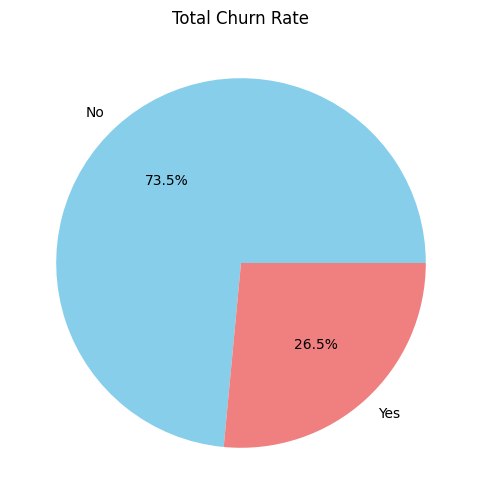

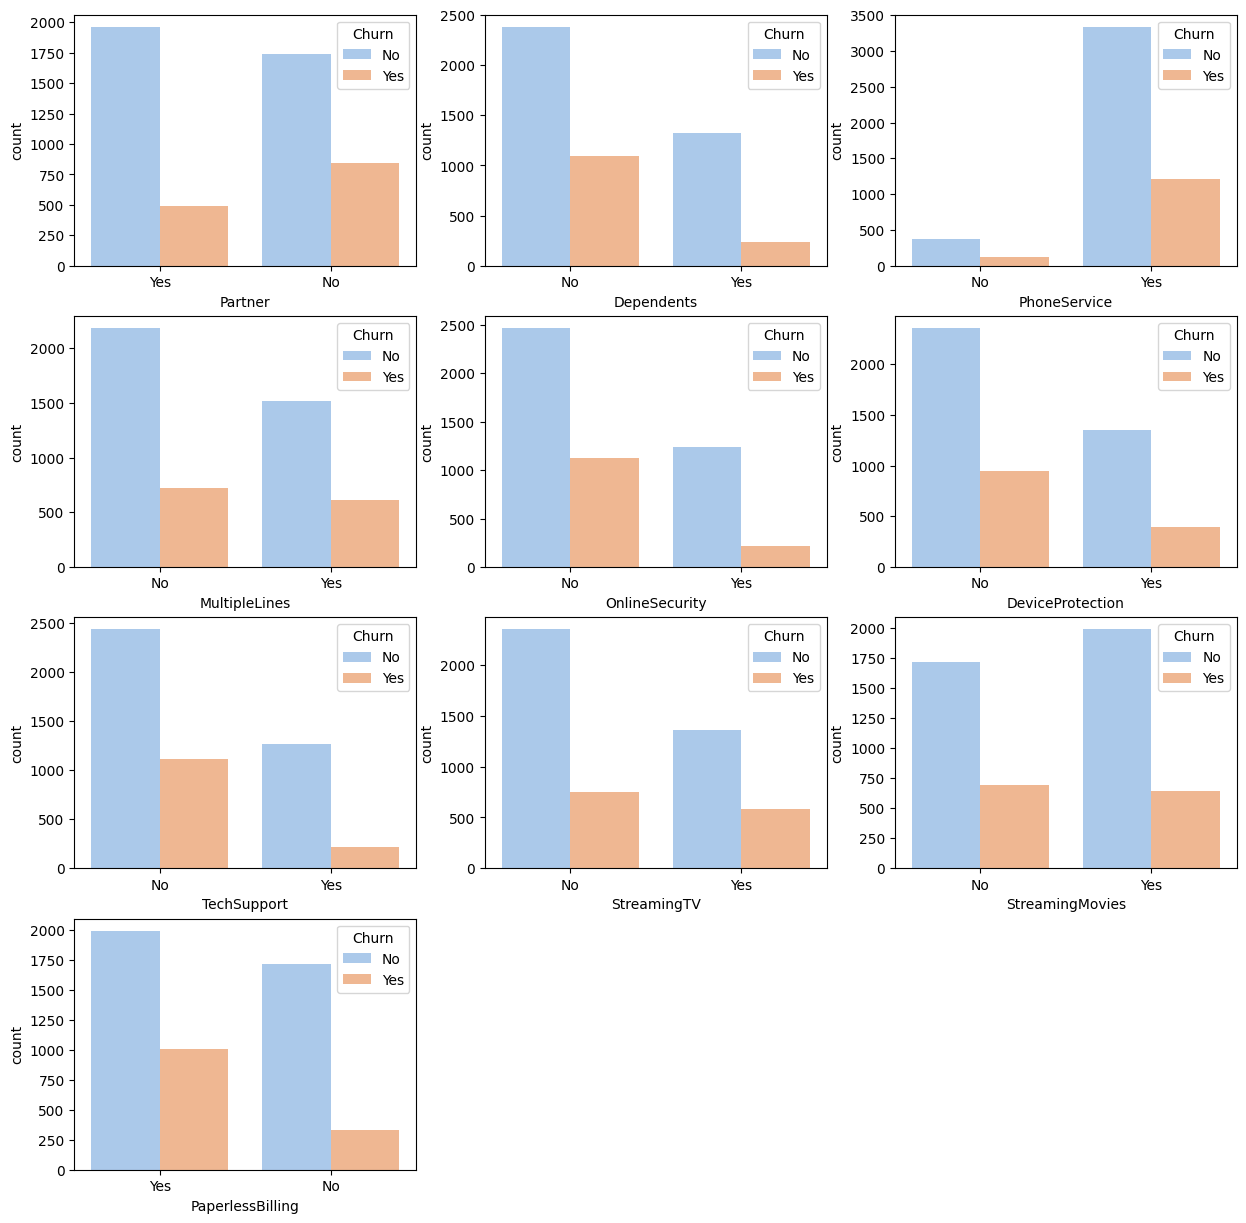

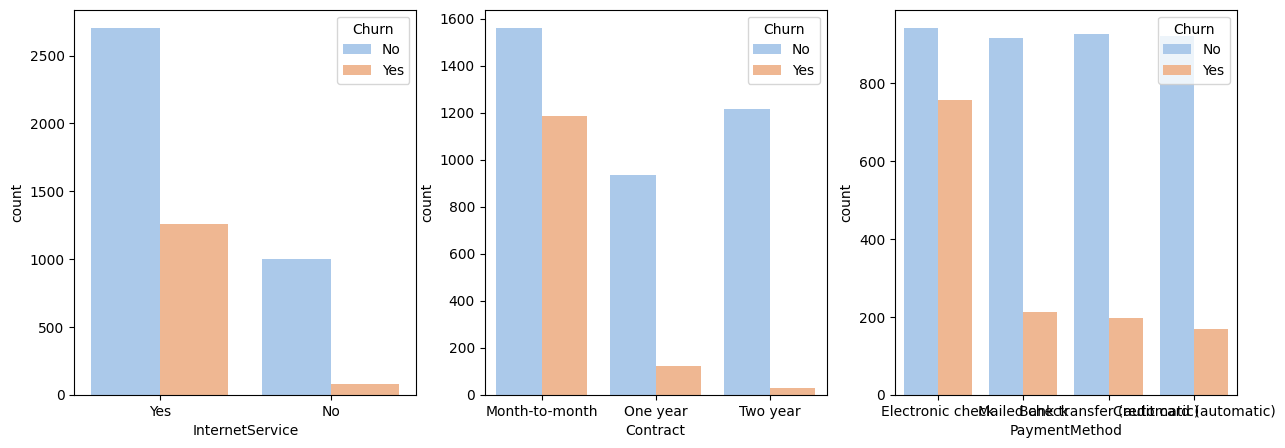

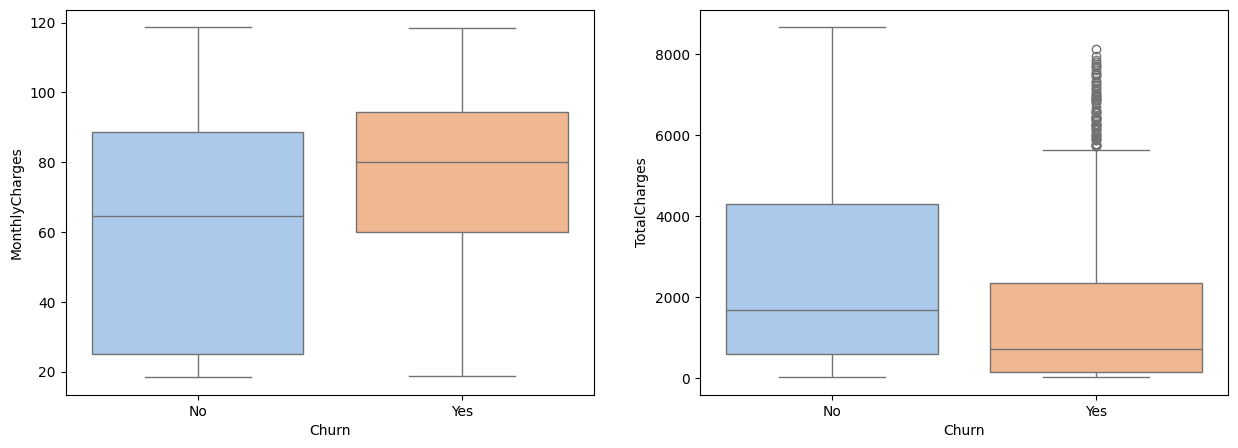

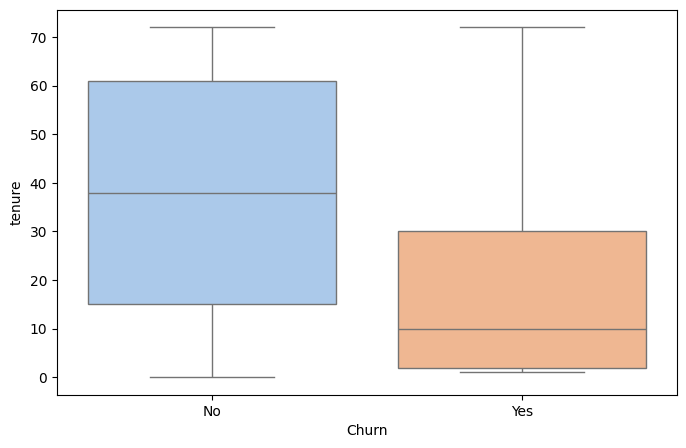

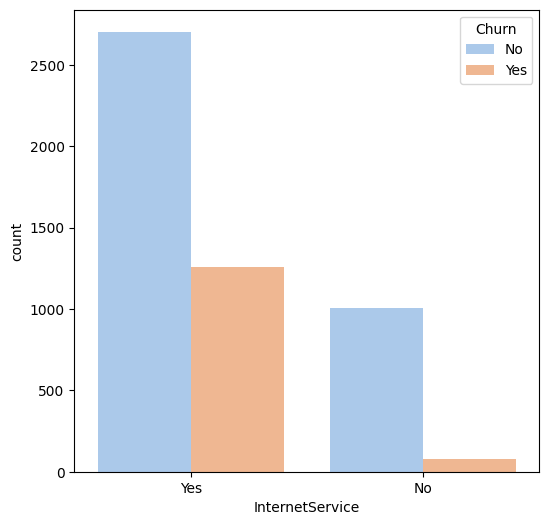

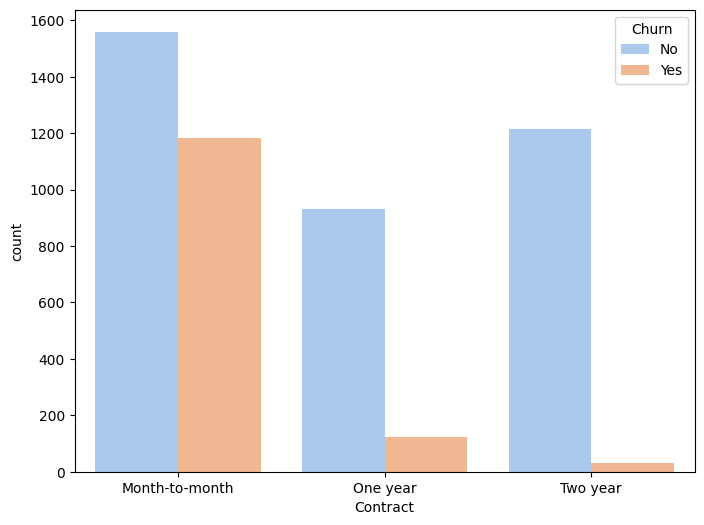

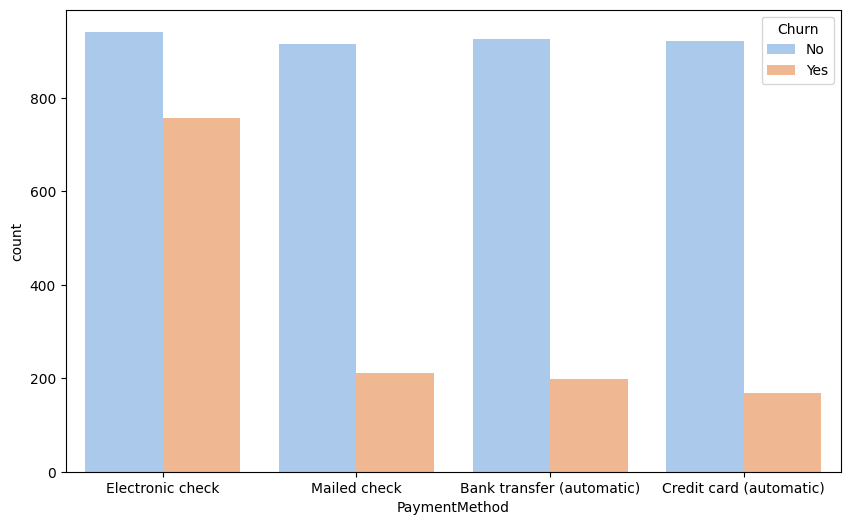

In [ ]:


# 1. Total Churn Rate
plt.figure(figsize=(6, 6))
df['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Total Churn Rate')
plt.ylabel('')


# 2. Effect of Boolean Attributes on Churn
boolean_attributes = ["Partner", "Dependents", "PhoneService", "MultipleLines", 
                      "OnlineSecurity", "DeviceProtection", "TechSupport", 
                      "StreamingTV", "StreamingMovies", "PaperlessBilling"]
plt.figure(figsize=(15, 15))
for i, attribute in enumerate(boolean_attributes, 1):
    plt.subplot(4, 3, i)
    sns.countplot(data=df, x=attribute, hue='Churn', palette='pastel')
   

# 3. Effect of Non-Boolean Attributes on Churn
non_boolean_attributes = ["InternetService", "Contract", "PaymentMethod"]
plt.figure(figsize=(15, 5))
for i, attribute in enumerate(non_boolean_attributes, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df, x=attribute, hue='Churn', palette='pastel')

# 4. Effect of Numerical Attributes on Churn
plt.figure(figsize=(15, 5))
for i, attribute in enumerate(["MonthlyCharges", "TotalCharges"], 1):
    plt.subplot(1, 2, i)
    sns.boxplot(data=df, x='Churn', y=attribute, palette='pastel')

# 5. Effect of Tenure on Churn
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Churn', y='tenure', palette='pastel')

# 6. Effect of Internet Service Type on Churn
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='InternetService', hue='Churn', palette='pastel')

# 7. Effect of Contract Type on Churn
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Contract', hue='Churn', palette='pastel')

# 8. Effect of Payment Method on Churn
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette='pastel')

plt.show()


<Axes: >

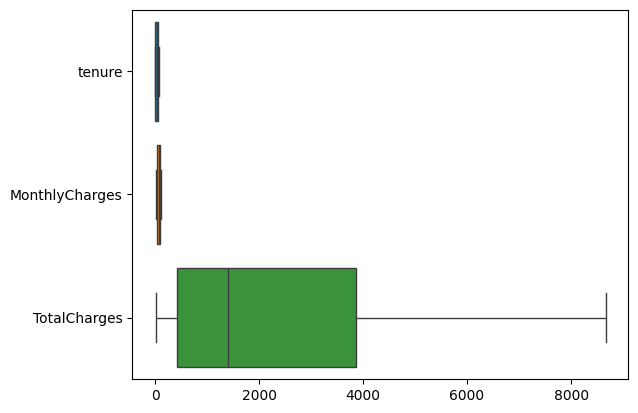

In [ ]:
sns.boxplot(full_data, orient = 'h')

#### Drop MonthlyIncome and tenure

<Axes: >

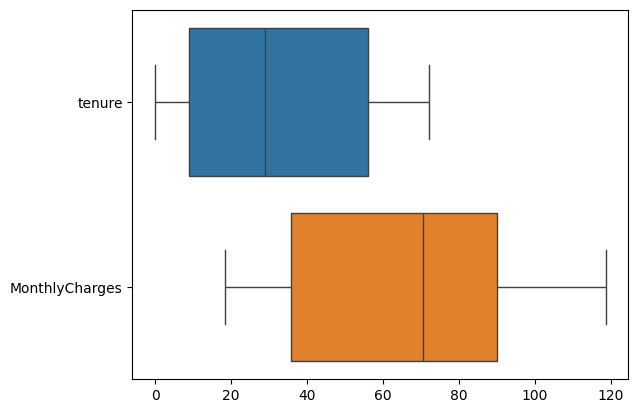

In [ ]:
sns.boxplot(full_data.drop(['TotalCharges'],axis = 1), orient = 'h')

<Axes: >

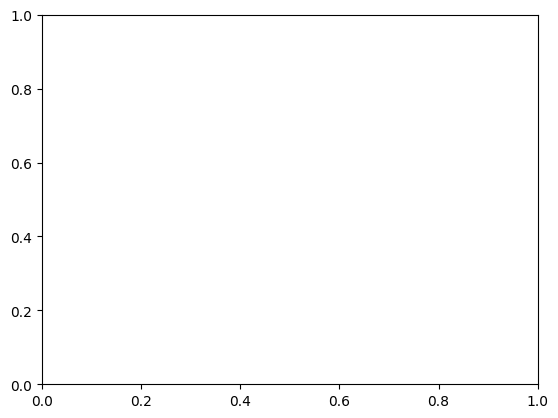

In [ ]:
sns.boxplot(full_data.drop(['TotalCharges','tenure','MonthlyCharges'],axis = 1), orient = 'h')


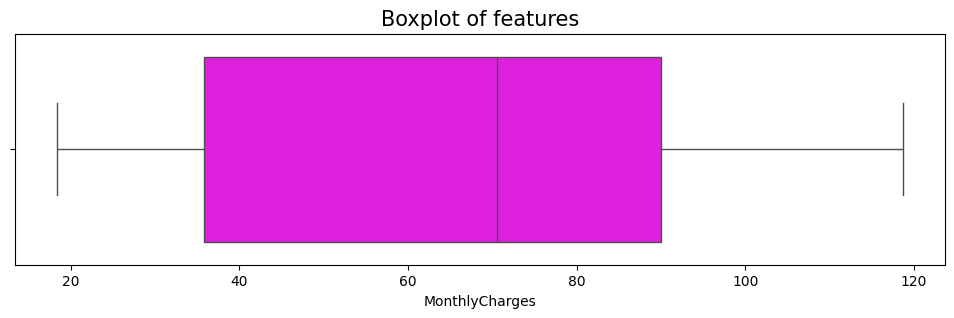

In [ ]:
plt.figure(figsize = (12,3))
sns.boxplot(full_data['MonthlyCharges'], orient = 'h',color ='magenta')
plt.title('Boxplot of features',fontsize = 15)
plt.show()

In [ ]:
#Show skewness
full_data.select_dtypes(include=['float']).skew()




MonthlyCharges   -0.238767
TotalCharges      0.945130
dtype: float64

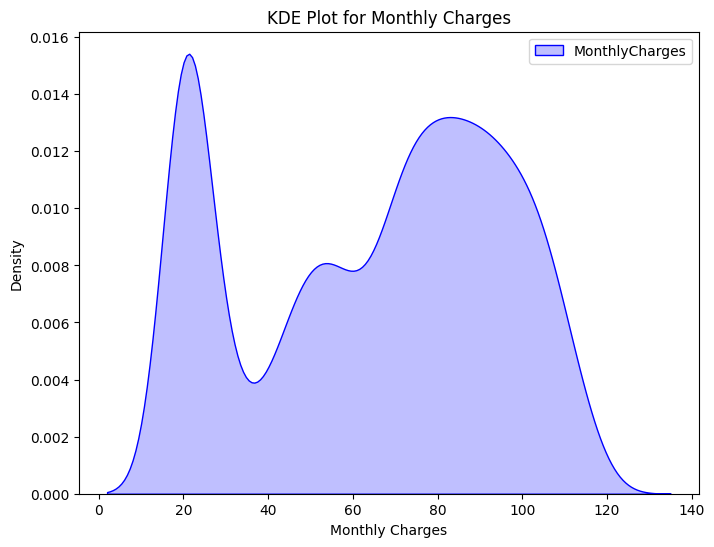

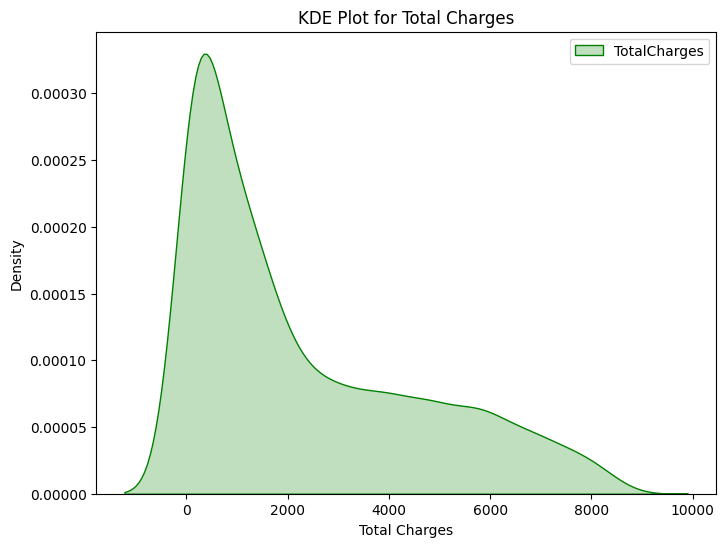

In [ ]:
# Plotting MonthlyCharges
plt.figure(figsize=(8, 6))
sns.kdeplot(data=full_data['MonthlyCharges'], fill=True, color='blue', label='MonthlyCharges')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.title('KDE Plot for Monthly Charges')
plt.legend()
plt.show()

# Plotting TotalCharges
plt.figure(figsize=(8, 6))
sns.kdeplot(data=full_data['TotalCharges'], fill=True, color='green', label='TotalCharges')
plt.xlabel('Total Charges')
plt.ylabel('Density')
plt.title('KDE Plot for Total Charges')
plt.legend()
plt.show()





In [ ]:
#Show skewness
skew = full_data.select_dtypes(include=['float']).skew().sum()
print(f'The skewnes of the numerical features in the dataset is {round(skew, 2)}')

The skewnes of the numerical features in the dataset is 0.71


In [ ]:
# Assuming 'full_data' is your DataFrame containing the columns 'MonthlyCharges' and 'TotalCharges'
correlation = full_data[['MonthlyCharges', 'TotalCharges','tenure']].corr()
correlation


,MonthlyCharges,TotalCharges,tenure
MonthlyCharges,1.000000,0.646993,0.240645
TotalCharges,0.646993,1.000000,0.826451
tenure,0.240645,0.826451,1.000000


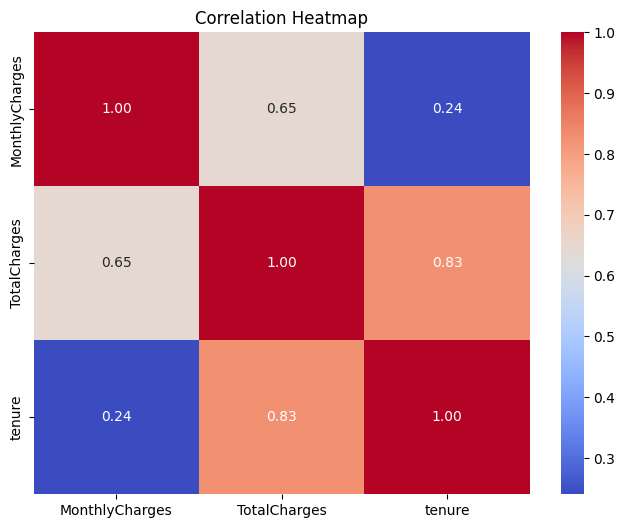

In [ ]:
# Plotting correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


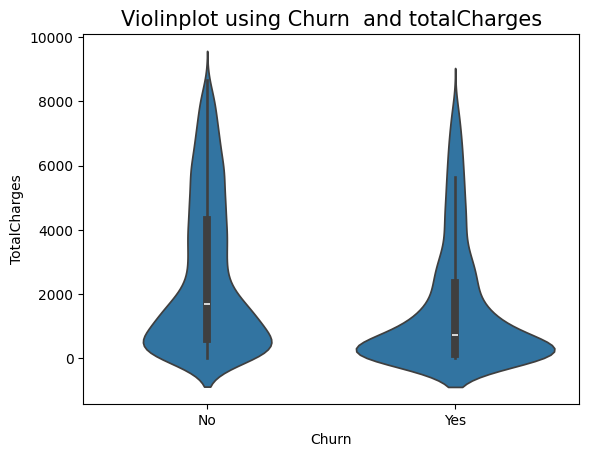

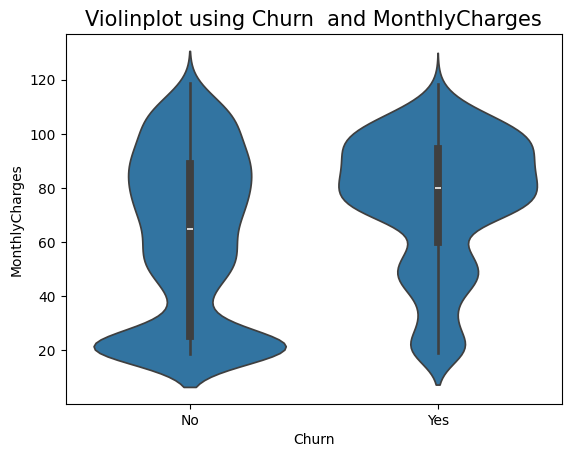

In [ ]:
sns.violinplot(data = full_data,x = 'Churn',y = 'TotalCharges')
plt.title('Violinplot using Churn  and totalCharges', fontsize = 15)
plt.show()

sns.violinplot(data = full_data,x = 'Churn',y = 'MonthlyCharges')
plt.title('Violinplot using Churn  and MonthlyCharges', fontsize = 15)
plt.show()

### Multiveriate Analysis
 1.  Which gender had the higest churn


In [ ]:
#Grouping churn counts by gender and churn status
grouped_churn = full_data.groupby('gender')['Churn'].value_counts().rename('Breakdown').reset_index()
grouped_churn


,gender,Churn,Breakdown
0,Female,No,1823
1,Female,Yes,661
2,Male,No,1884
3,Male,Yes,675


In [ ]:
grouped_churn['Ratio'] = grouped_churn.groupby('gender')['Breakdown'].transform(lambda x: x/ x.sum() *100)
grouped_churn

,gender,Churn,Breakdown,Ratio
0,Female,No,1823,73.389694
1,Female,Yes,661,26.610306
2,Male,No,1884,73.622509
3,Male,Yes,675,26.377491


### Hypothesis testing

In [ ]:


# Assuming 'full_data' is your DataFrame containing 'MonthlyCharges' and 'Churn' columns
# Extract MonthlyCharges and Churn columns
monthly_charges = full_data['MonthlyCharges']
churn = full_data['Churn']

# Encode 'Churn' column to numerical format
label_encoder = LabelEncoder()
churn_encoded = label_encoder.fit_transform(churn)

# Calculate Pearson correlation coefficient and p-value
correlation_coef, p_value = stats.pearsonr(monthly_charges, churn_encoded)

# Print correlation coefficient and p-value
print("Pearson Correlation Coefficient:", correlation_coef)
print("P-value:", p_value)

# Define significance level (alpha)
alpha = 0.05

# Check if p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis. There is a statistically significant correlation between MonthlyCharges and customer churn.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant correlation between MonthlyCharges and customer churn.")


Pearson Correlation Coefficient: 0.20208910644737813
P-value: 1.2575465113528094e-47
Reject the null hypothesis. There is a statistically significant correlation between MonthlyCharges and customer churn.


### Data Preperation

- Check if dataset is balanced

In [ ]:
full_data['InternetService'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
full_data['OnlineBackup'].unique()

array([True, False, 'No', 'Yes', 'No internet service'], dtype=object)

In [ ]:
# Drop the 'customerID' column from the DataFrame becausing during the training stage encoding the column is challenging
full_data = full_data.drop('customerID', axis=1)
 
# Display the DataFrame after dropping the column
print("\nDataFrame after dropping the 'customerID' column:")
full_data.head()


DataFrame after dropping the 'customerID' column:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No,Yes,No,True,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,Male,No,No,No,34,Yes,No,Yes,Yes,False,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,Male,No,No,No,2,Yes,No,Yes,Yes,True,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,Male,No,No,No,45,No,No,Yes,Yes,False,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,Female,No,No,No,2,Yes,No,Yes,No,False,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [ ]:
full_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No,Yes,No,True,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,Male,No,No,No,34,Yes,No,Yes,Yes,False,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,Male,No,No,No,2,Yes,No,Yes,Yes,True,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,Male,No,No,No,45,No,No,Yes,Yes,False,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,Female,No,No,No,2,Yes,No,Yes,No,False,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [ ]:





# Create DataFrame
df = pd.DataFrame(full_data)

# Encode categorical variables
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})
df['Partner'] = df['Partner'].map({'No': 0, 'Yes': 1})
df['SeniorCitizen'] = df['SeniorCitizen'].map({'No': 0, 'Yes': 1})
df['Dependents'] = df['Dependents'].map({'No': 0, 'Yes': 1})
df['PhoneService'] = df['PhoneService'].map({'No': 0, 'Yes': 1})
df['MultipleLines'] = df['MultipleLines'].map({'No': 0, 'Yes': 1})
df['InternetService'] = df['InternetService'].map({'No': 0, 'Yes': 1})
df['OnlineSecurity'] = df['OnlineSecurity'].map({'No': 0, 'Yes': 1})
df['OnlineBackup'] = df['OnlineBackup'].map({False: 0, 'No': 0, True: 1, 'Yes': 1, 'No internet service': 2})
df['DeviceProtection'] = df['DeviceProtection'].map({'No': 0, 'Yes': 1})
df['TechSupport'] = df['TechSupport'].map({'No': 0, 'Yes': 1})
df['StreamingTV'] = df['StreamingTV'].map({'No': 0, 'Yes': 1})
df['StreamingMovies'] = df['StreamingMovies'].map({'No': 0, 'Yes': 1})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'No': 0, 'Yes': 1})
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Encode Contract and PaymentMethod using one-hot encoding
df = pd.get_dummies(df, columns=['Contract', 'PaymentMethod'])

# Print encoded DataFrame
df.head()



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,0,1,...,29.850000,29.850000,0,True,False,False,False,False,True,False
1,1,0,0,0,34,1,0,1,1,0,...,56.950001,1889.500000,0,False,True,False,False,False,False,True
2,1,0,0,0,2,1,0,1,1,1,...,53.849998,108.150002,1,True,False,False,False,False,False,True
3,1,0,0,0,45,0,0,1,1,0,...,42.299999,1840.750000,0,False,True,False,True,False,False,False
4,0,0,0,0,2,1,0,1,0,0,...,70.699997,151.649994,1,True,False,False,False,False,True,False


In [ ]:

import pandas as pd
import numpy as np

# Assuming df is the DataFrame you want to convert

# Replace non-finite values with appropriate values (e.g., replace NaN with 0)
df.fillna(0, inplace=True)

# Convert boolean values to 1 and 0
df = df.astype(int)

# Print the DataFrame with boolean values converted to 1 and 0
df



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,0,1,...,29,29,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,1,0,...,56,1889,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,1,...,53,108,1,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,1,0,...,42,1840,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,1,0,0,...,70,151,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,1,0,1,1,24,1,1,1,1,0,...,84,1990,0,0,1,0,0,0,0,1
5039,0,0,1,1,72,1,1,1,0,1,...,103,7362,0,0,1,0,0,1,0,0
5040,0,0,1,1,11,0,0,1,1,0,...,29,346,0,1,0,0,0,0,1,0
5041,1,1,1,0,4,1,1,1,0,0,...,74,306,1,1,0,0,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   gender                                   5043 non-null   int32
 1   SeniorCitizen                            5043 non-null   int32
 2   Partner                                  5043 non-null   int32
 3   Dependents                               5043 non-null   int32
 4   tenure                                   5043 non-null   int32
 5   PhoneService                             5043 non-null   int32
 6   MultipleLines                            5043 non-null   int32
 7   InternetService                          5043 non-null   int32
 8   OnlineSecurity                           5043 non-null   int32
 9   OnlineBackup                             5043 non-null   int32
 10  DeviceProtection                         5043 non-null   int32
 11  Tech

In [ ]:
df.isna().sum()

gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
MultipleLines                              0
InternetService                            0
OnlineSecurity                             0
OnlineBackup                               0
DeviceProtection                           0
TechSupport                                0
StreamingTV                                0
StreamingMovies                            0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_Two year                          0
PaymentMethod_Bank transfer (automatic)    0
PaymentMet

In [ ]:
#store df values in full_data
full_data = df
full_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,0,1,...,29,29,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,1,0,...,56,1889,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,1,...,53,108,1,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,1,0,...,42,1840,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,1,0,0,...,70,151,1,1,0,0,0,0,1,0


In [ ]:
class_distro = full_data['Churn'].value_counts().rename('Total').reset_index()
class_distro

,Churn,Total
0,0,3707
1,1,1336


In [ ]:
class_distro['Ratio'] = class_distro['Total'].apply(lambda x: round((x/class_distro['Total'].sum()) * 100, 2))
class_distro

,Churn,Total,Ratio
0,0,3707,73.51
1,1,1336,26.49


### **Split Dataset into Training and Evaluation**

- X = input_data
- y = Label

In [ ]:
full_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,0,1,...,29,29,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,1,0,...,56,1889,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,1,...,53,108,1,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,1,0,...,42,1840,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,1,0,0,...,70,151,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,1,0,1,1,24,1,1,1,1,0,...,84,1990,0,0,1,0,0,0,0,1
5039,0,0,1,1,72,1,1,1,0,1,...,103,7362,0,0,1,0,0,1,0,0
5040,0,0,1,1,11,0,0,1,1,0,...,29,346,0,1,0,0,0,0,1,0
5041,1,1,1,0,4,1,1,1,0,0,...,74,306,1,1,0,0,0,0,0,1


In [ ]:
X = full_data.drop('Churn',axis = 1)
y = full_data['Churn']

In [ ]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,0,1,...,1,29,29,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,1,0,...,0,56,1889,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,1,...,1,53,108,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,1,0,...,0,42,1840,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,1,0,0,...,1,70,151,1,0,0,0,0,1,0


In [ ]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [ ]:


# Assuming X is your feature matrix and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
encoder  = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)




In [ ]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1046,0,0,0,0,52,1,1,1,1,0,...,0,74,3877,0,1,0,0,1,0,0
2727,1,0,0,0,5,1,1,1,0,0,...,1,94,462,1,0,0,1,0,0,0
3139,1,0,1,1,50,1,1,0,0,2,...,0,24,1261,0,0,1,0,0,0,1
30,0,1,1,0,71,1,1,1,1,1,...,1,96,6766,0,0,1,0,1,0,0
725,1,1,1,0,9,1,0,0,0,0,...,1,21,204,1,0,0,0,0,0,1


In [ ]:
y_train.head()

1046    0
2727    1
3139    0
30      0
725     0
Name: Churn, dtype: int32

### Prepare pipelines

In [ ]:
non_numerical_columns = object_columns
non_numerical_columns 

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn'],
      dtype='object')

In [ ]:
numerical_columns = X.select_dtypes('number').columns
numerical_columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [ ]:


# Assuming 'x' is your DataFrame containing numerical columns
stand_scaler = StandardScaler()
stand_scaled = stand_scaler.fit_transform(x.select_dtypes(include='number'))
stand_scaled_df = pd.DataFrame(stand_scaled, columns=x.select_dtypes(include='number').columns)
stand_scaled_df.describe().T


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5043.0,-3.170179e-17,1.000099,-0.440332,-0.440332,-0.440332,-0.440332,2.271015
Partner,5043.0,1.331475e-16,1.000099,-0.975126,-0.975126,-0.975126,1.025509,1.025509
Dependents,5043.0,5.706322e-17,1.000099,-0.669556,-0.669556,-0.669556,1.493526,1.493526
tenure,5043.0,-3.522421e-18,1.000099,-1.328175,-0.961238,-0.145822,0.954988,1.607321
PhoneService,5043.0,1.972556e-17,1.000099,-3.051702,0.327686,0.327686,0.327686,0.327686
MultipleLines,5043.0,2.254349e-17,1.000099,-0.855105,-0.855105,-0.855105,1.169447,1.169447
InternetService,5043.0,8.946949e-17,1.000099,-1.915579,0.522035,0.522035,0.522035,0.522035
OnlineSecurity,5043.0,-1.408968e-17,1.000099,-0.637111,-0.637111,-0.637111,1.569586,1.569586
DeviceProtection,5043.0,-1.331475e-16,1.000099,-0.727080,-0.727080,-0.727080,1.375365,1.375365
TechSupport,5043.0,-4.508699e-17,1.000099,-0.647892,-0.647892,-0.647892,1.543468,1.543468


<Axes: ylabel='Density'>

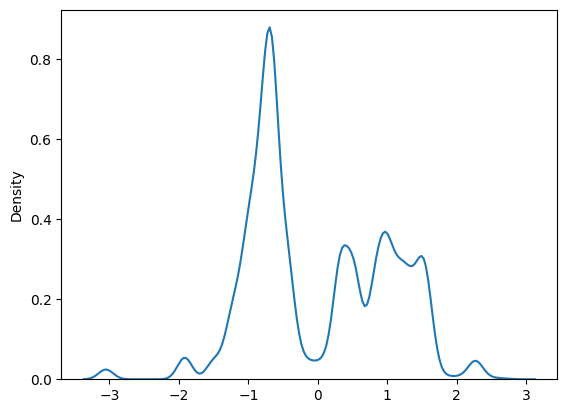

In [ ]:
sns.kdeplot(stand_scaled_df.values.ravel())

In [ ]:


# Assuming 'x' is your DataFrame containing numerical columns
robust_scaler = RobustScaler()
r_scaled = robust_scaler.fit_transform(x.select_dtypes(include='number'))
r_scaled_df = pd.DataFrame(r_scaled, columns=x.select_dtypes(include='number').columns)
r_scaled_df.describe().T


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5043.0,0.162403,0.368857,0.000000,0.000000,0.000000e+00,0.000000,1.000000
Partner,5043.0,0.487408,0.499891,0.000000,0.000000,0.000000e+00,1.000000,1.000000
Dependents,5043.0,0.309538,0.462349,0.000000,0.000000,0.000000e+00,1.000000,1.000000
tenure,5043.0,0.076099,0.521911,-0.617021,-0.425532,0.000000e+00,0.574468,0.914894
PhoneService,5043.0,-0.096966,0.295941,-1.000000,0.000000,0.000000e+00,0.000000,0.000000
MultipleLines,5043.0,0.422368,0.493985,0.000000,0.000000,0.000000e+00,1.000000,1.000000
InternetService,5043.0,-0.214158,0.410278,-1.000000,0.000000,0.000000e+00,0.000000,0.000000
OnlineSecurity,5043.0,0.288717,0.453211,0.000000,0.000000,0.000000e+00,1.000000,1.000000
DeviceProtection,5043.0,0.345826,0.475684,0.000000,0.000000,0.000000e+00,1.000000,1.000000
TechSupport,5043.0,0.295657,0.456383,0.000000,0.000000,0.000000e+00,1.000000,1.000000


<Axes: ylabel='Density'>

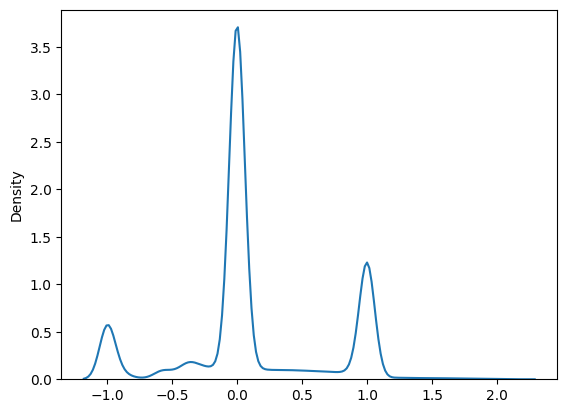

In [ ]:
sns.kdeplot(r_scaled_df.values.ravel())

In [ ]:


# Assuming 'x' is your DataFrame containing numerical columns
minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(x.select_dtypes(include='number'))
minmax_scaled_df = pd.DataFrame(minmax_scaled, columns=x.select_dtypes(include='number').columns)
minmax_scaled_df.describe().T


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5043.0,0.162403,0.368857,0.0,0.000000,0.000000,0.000000,1.0
Partner,5043.0,0.487408,0.499891,0.0,0.000000,0.000000,1.000000,1.0
Dependents,5043.0,0.309538,0.462349,0.0,0.000000,0.000000,1.000000,1.0
tenure,5043.0,0.452453,0.340692,0.0,0.125000,0.402778,0.777778,1.0
PhoneService,5043.0,0.903034,0.295941,0.0,1.000000,1.000000,1.000000,1.0
MultipleLines,5043.0,0.422368,0.493985,0.0,0.000000,0.000000,1.000000,1.0
InternetService,5043.0,0.785842,0.410278,0.0,1.000000,1.000000,1.000000,1.0
OnlineSecurity,5043.0,0.288717,0.453211,0.0,0.000000,0.000000,1.000000,1.0
DeviceProtection,5043.0,0.345826,0.475684,0.0,0.000000,0.000000,1.000000,1.0
TechSupport,5043.0,0.295657,0.456383,0.0,0.000000,0.000000,1.000000,1.0


<Axes: ylabel='Density'>

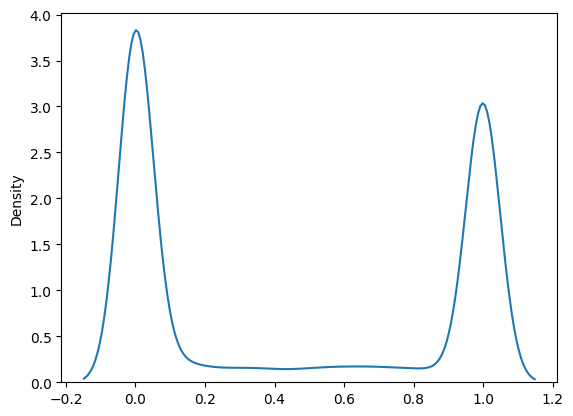

In [ ]:
sns.kdeplot(minmax_scaled_df.values.ravel())

In [ ]:

numeric_pipeline = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler()),
])

categorical_pipeline = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

preprocesor = ColumnTransformer(transformers=[
    ('num_pipeline', numeric_pipeline, numerical_columns),
    ('cat_pipeline', categorical_pipeline, categorical_columns)
])



## Modelling

In [ ]:

models = [
    ('Decsion_Tree',DecisionTreeClassifier(random_state = 42)),
    ('Logistic Regression', LogisticRegression(random_state = 42)),
    ('KNN', KNeighborsClassifier(n_neighbors = 5)),
    ('Random Forest', RandomForestClassifier(random_state = 42))
]

In [ ]:
all_pipelines = {}
for model_name, classifier in models:
    final_pipeline =  Pipeline(steps =[
        ('preprocesor',preprocesor),
        ('classifier',classifier)
    ])
    #Fit date to pipeline
    #final_pipeline.fit(X_train, y_train_encoded)
    all_pipelines


In [ ]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1046,0,0,0,0,52,1,1,1,1,0,...,0,74,3877,0,1,0,0,1,0,0
2727,1,0,0,0,5,1,1,1,0,0,...,1,94,462,1,0,0,1,0,0,0
3139,1,0,1,1,50,1,1,0,0,2,...,0,24,1261,0,0,1,0,0,0,1
30,0,1,1,0,71,1,1,1,1,1,...,1,96,6766,0,0,1,0,1,0,0
725,1,1,1,0,9,1,0,0,0,0,...,1,21,204,1,0,0,0,0,0,1


In [ ]:
y_train_encoded

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
full_data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
models

[('Decsion_Tree', DecisionTreeClassifier(random_state=42)),
 ('Logistic Regression', LogisticRegression(random_state=42)),
 ('KNN', KNeighborsClassifier()),
 ('Random Forest', RandomForestClassifier(random_state=42))]

In [ ]:
import pandas as pd

# Given data
data = y_train

# Create DataFrame
y_train = pd.DataFrame(data)

y_train

,Churn
1046,No
2727,Yes
3139,No
30,No
725,No
...,...
4426,No
466,No
3092,No
3772,No


In [ ]:
# Define the pipeline without including the target variable 'Churn'
for model_name, classifier in models:
    final_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
    # Fit the pipeline to the training data
    final_pipeline.fit(X_train, y_train_encoded)
    # Store the trained pipeline in the all_pipelines dictionary
    all_pipelines[model_name] = final_pipeline


ValueError: A given column is not a column of the dataframe

In [ ]:
all_pipelines = {}

for model_name, classifier in models:
    final_pipeline = Pipeline(steps=[
        ('preprocesor', preprocesor),
        ('classifier', classifier)
    ])

    final_pipeline.fit(X_train, y_train_encoded)
    all_pipelines[model_name] = final_pipeline
    all_pipelines   


ValueError: A given column is not a column of the dataframe

In [ ]:
# Check if 'Churn' is in the column names of X_train
if 'Churn' in X_train.columns:
    print("Error: 'Churn' column found in X_train. Please remove it.")
else:
    print("X_train does not contain the 'Churn' column. It only contains predictor variables.")


X_train does not contain the 'Churn' column. It only contains predictor variables.


#### Key Insights
The entire dataset has a positive skewness with a right tail of 0.72
Both TotalCharges and MonthlyCharges increases with increase in tenure
TotalCharges is significantly a dominant feature affecting churn

In [ ]:
if 'Churn' in y_train.columns:
    print("'Churn' column found in y_train.")
else:
    print("'Churn' column not found in y_train.")


'Churn' column found in y_train.
